**Aim: Analyze Big Data concepts, Hadoop architecture, and ecosystem components, and examine datasets through exploratory data analysis and data profiling to interpret large-scale data environments.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)

#Dataset link: https://www.kaggle.com/datasets/joebeachcapital/airbnb/data
# Load dataset
df = pd.read_csv("/content/airbnb-listings.csv", sep=';', encoding='utf-8-sig', on_bad_lines='skip')

df.head()

/tmp/ipython-input-1997098383.py:11: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/airbnb-listings.csv", sep=';', encoding='utf-8-sig', on_bad_lines='skip')


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,Perfect location to enjoy Amsterdam's famous e...,NaN,NaN,NaN,I expect you to treat my beloved apartment as ...,https://a0.muscache.com/im/pictures/f3940538-4...,https://a0.muscache.com/im/pictures/f3940538-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/f3940538-4...,20786453,https://www.airbnb.com/users/show/20786453,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",Hi there! As I love to travel myself I know ho...,within a day,50.0,NaN,https://a0.muscache.com/im/pictures/1a40195b-8...,https://a0.muscache.com/im/pictures/1a40195b-8...,Oud-West,1.0,1.0,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, North Holland 1054 AA, Ne...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,North Holland,1054 AA,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.365237,4.878250,Apartment,Entire home/apt,6.0,1.0,3.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,600.0,NaN,6000.0,500.0,50.0,4.0,50.0,2.0,1125.0,3 weeks ago,NaN,14.0,44.0,74.0,74.0,2017-04-02,31.0,2015-08-02,2016-11-27,89.0,9.0,8.0,9.0,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,NaN,Public transport is very close - 100 meters,NaN,You'll have the apartment for yourselves,no smoking inside no pets no load music after ...,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,11964927,https://www.airbnb.com/users/show/11964927,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",I live together with my girlfriend in our apar...,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/11964927/prof...,https://a0.muscache.com/im/users/11964927/prof...,Oud-West,1.0,1.0,"email,phone,reviews,jumio,work_email","Oud-West, Amsterdam, Noord-Holland 1053, Nethe...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,Noord-Holland,1053,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.367309,4.873841,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,175.0,NaN,4000.0,400.0,40.0,2.0,30.0,2.0,112

In [ ]:
!head -n 5 /content/airbnb-listings.csv

﻿ID;Listing Url;Scrape ID;Last Scraped;Name;Summary;Space;Description;Experiences Offered;Neighborhood Overview;Notes;Transit;Access;Interaction;House Rules;Thumbnail Url;Medium Url;Picture Url;XL Picture Url;Host ID;Host URL;Host Name;Host Since;Host Location;Host About;Host Response Time;Host Response Rate;Host Acceptance Rate;Host Thumbnail Url;Host Picture Url;Host Neighbourhood;Host Listings Count;Host Total Listings Count;Host Verifications;Street;Neighbourhood;Neighbourhood Cleansed;Neighbourhood Group Cleansed;City;State;Zipcode;Market;Smart Location;Country Code;Country;Latitude;Longitude;Property Type;Room Type;Accommodates;Bathrooms;Bedrooms;Beds;Bed Type;Amenities;Square Feet;Price;Weekly Price;Monthly Price;Security Deposit;Cleaning Fee;Guests Included;Extra People;Minimum Nights;Maximum Nights;Calendar Updated;Has Availability;Availability 30;Availability 60;Availability 90;Availability 365;Calendar last Scraped;Number of Reviews;First Review;Last Review;Review Scores Rat

In [ ]:
#a) Data Volume Analysis
#Number of Records & Attributes
num_rows, num_cols = df.shape
num_rows, num_cols

(494954, 89)

In [ ]:
#Storage Size of Dataset
df.memory_usage(deep=True).sum() / (1024 ** 2)

np.float64(3239.7591314315796)

In [ ]:
#Time Growth Analysis (if timestamp exists)
# Convert date columns if present
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

    df.groupby(df['last_review'].dt.year).size()

In [ ]:
#b) Data Variety Analysis
#Data Types
df.dtypes.value_counts()

,count
object,55
float64,33
int64,1


In [ ]:
#Identify Semi-Structured / Complex Fields
df.select_dtypes(include=['object']).head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Amenities,Calendar Updated,Has Availability,Calendar last Scraped,First Review,Last Review,License,Jurisdiction Names,Cancellation Policy,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,Perfect location to enjoy Amsterdam's famous e...,NaN,NaN,NaN,I expect you to treat my beloved apartment as ...,https://a0.muscache.com/im/pictures/f3940538-4...,https://a0.muscache.com/im/pictures/f3940538-4...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/f3940538-4...,https://www.airbnb.com/users/show/20786453,Lithal,2014-09-01,"Amsterdam, North Holland, Netherlands",Hi there! As I love to travel myself I know ho...,within a day,NaN,https://a0.muscache.com/im/pictures/1a40195b-8...,https://a0.muscache.com/im/pictures/1a40195b-8...,Oud-West,"email,phone,facebook,reviews,jumio","Oud-West, Amsterdam, North Holland 1054 AA, Ne...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,North Holland,1054 AA,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",3 weeks ago,NaN,2017-04-02,2015-08-02,2016-11-27,NaN,Amsterdam,strict,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,NaN,Public transport is very close - 100 meters,NaN,You'll have the apartment for yourselves,no smoking inside no pets no load music after ...,NaN,NaN,https://public.opendatasoft.com/api/explore/v2...,NaN,https://www.airbnb.com/users/show/11964927,Hein,2014-02-05,"Amsterdam, North Holland, The Netherlands",I live together with my girlfriend in our apar...,within a few hours,NaN,https://a0.muscache.com/im/users/11964927/prof...,https://a0.muscache.com/im/users/11964927/prof...,Oud-West,"email,phone,reviews,jumio,work_email","Oud-West, Amsterdam, Noord-Holland 1053, Nethe...",Oud-West,De Baarsjes - Oud-West,NaN,Amsterdam,Noord-Holland,1053,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",5 weeks ago,NaN,2017-04-02,2015-09-28,2017-01-19,NaN,Amsterdam,strict,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/105168520/...,https://a0.muscache.com/im/pictures/105168520/...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/105168520/...,https://www.airbnb.com/users/show/23669273,Matthieu,2014-11-12,"Amsterdam, North Holland, The Netherlands",NaN,NaN,NaN,https://a0.muscache.com/im/users/23669273/prof...,https://a0.muscache.com/im/users/23669273/prof...,Oud-West,"email,p

In [ ]:
#c)Data Quality Analysis
#Duplicate Records
df.duplicated().sum()

np.int64(0)

In [ ]:
#Inconsistent Formats
print(df.columns.tolist())
# After identifying the correct column name, you can replace 'Correct_Price_Column_Name' below
# df['Correct_Price_Column_Name'].head()

['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Max

In [ ]:
#Inconsistent Formats - checking 'Price' column
df['Price'].head()

,Price
0,600.0
1,175.0
2,125.0
3,130.0
4,80.0


In [ ]:
# Clean price column
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(r'[$,]', '', regex=True)
    .astype(float)
)

In [ ]:
df[df['Price'] <= 0].shape

(22, 89)

In [ ]:
#d) 🧠 Schema & Schema Drift Analysis
#Schema Inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494954 entries, 0 to 494953
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              494954 non-null  object 
 1   Listing Url                     494954 non-null  object 
 2   Scrape ID                       494954 non-null  object 
 3   Last Scraped                    494953 non-null  object 
 4   Name                            494536 non-null  object 
 5   Summary                         478753 non-null  object 
 6   Space                           347018 non-null  object 
 7   Description                     494794 non-null  object 
 8   Experiences Offered             494954 non-null  object 
 9   Neighborhood Overview           291604 non-null  object 
 10  Notes                           197590 non-null  object 
 11  Transit                         303786 non-null  object 
 12  Access          

In [ ]:
#Schema Drift Over Time
# Convert 'Last Review' to datetime and then check missing columns over time
df['Last Review'] = pd.to_datetime(df['Last Review'], errors='coerce')
df.groupby(df['Last Review'].dt.year).apply(lambda x: x.isnull().mean())

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
Last Review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,1.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2010.0,0.0,0.0,0.0,0.0,0.000000,0.461538,0.000000,0.000000,0.0,0.538462,0.692308,0.615385,0.615385,0.692308,0.307692,0.538462,0.538462,0.000000,0.538462,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.384615,0.384615,0.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.0,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.846154,0.000000,0.769231,0.538462,0.615385,0.461538,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.307692,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.923077,0.538462,0.0,0.000000,0.000000,0.0,0.000000
2011.0,0.0,0.0,0.0,0.0,0.000000,0.403226,0.032258,0.000000,0.0,0.661290,0.790323,0.612903,0.693548,0.774194,0.387097,0.483871,0.483871,0.000000,0.483871,0.0,0.0,0.000000,0.000000,0.000000,0.096774,0.435484,0.435484,0.935484,0.000000,0.000000,0.080645,0.000000,0.000000,0.000000,0.0,0.096774,0.0,0.758065,0.000000,0.032258,0.016129,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.096774,0.048387,0.016129,0.0,0.000000,0.580645,0.032258,0.451613,0.532258,0.548387,0.290323,0.0,0.000000,0.0,0.0,0.0,0.983871,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.080645,0.129032,0.129032,0.129032,0.129032,0.129032,0.145161,1.000000,0.629032,0.0,0.000000,0.000000,0.0,0.000000
2012.0,0.0,0.0,0.0,0.0,0.000000,0.605590,0.006211,0.000000,0.0,0.754658,0.863354,0.736025,0.773292,0.788820,0.360248,0.372671,0.372671,0.003106,0.372671,0.0,0.0,0.003106,0.003106,0.003106,0.037267,0.468944,0.468944,0.928571,0.003106,0.003106,0.127329,0.003106,0.003106,0.003106,0.0,0.133540,0.0,0.779503,0.000000,0.093168,0.018634,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.093168,0.006211,0.015528,0.0,0.021739,0.599379,0.018634,0.453416,0.447205,0.478261,0.385093,0.0,0.000000,0.0,0.0,0.0,0.972050,0.0,0.0,0.0,0.0,0.0,0.0,0.003106,0.0,0.130435,0.074534,0.074534,0.074534,0.071429,0.074534,0.080745,0.984472,0.704969

In [ ]:
#e) Missing Value Analysis
#Missing Count & Percentage
missing_df = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().mean() * 100)
}).sort_values(by='Missing %', ascending=False)

missing_df

,Missing Count,Missing %
Has Availability,485647,98.119623
Square Feet,482745,97.533306
License,480358,97.051039
Host Acceptance Rate,452696,91.462237
Monthly Price,398863,80.585873
...,...,...
Host URL,0,0.000000
ID,0,0.000000
Scrape ID,0,0.000000
Listing Url,0,0.000000


In [ ]:
#f)  Data Distribution & Statistical Summary
#Numerical Summary
df.describe()

,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,4.949540e+05,379884.000000,494449.000000,494448.000000,494953.000000,494953.000000,494891.000000,493428.000000,494328.000000,494037.000000,12209.000000,486996.000000,97747.000000,96091.000000,204012.000000,315715.000000,494952.000000,494917.000000,494952.000000,4.949520e+05,494952.000000,494952.000000,494952.000000,494952.000000,494952.000000,373055,367134.000000,366237.000000,366479.000000,365918.000000,366434.000000,365969.000000,365873.000000,494087.000000,372947.000000
mean,3.234417e+07,93.376549,9.549721,9.549738,38.042292,-15.020974,3.311584,1.249632,1.378322,1.934525,575.544762,138.072703,493.650127,2961.696277,274.126703,62.267906,1.550235,12.028728,3.470415,2.123406e+05,9.961726,22.997256,37.878594,166.092332,16.740850,2016-11-03 05:35:33.790459904,92.913988,9.527773,9.328483,9.692770,9.709972,9.471171,9.323047,6.869659,1.479523
min,1.900000e+01,0.000000,0.000000,0.000000,-38.224427,-123.218712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2009-01-21 00:00:00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,6.886060e+06,98.000000,1.000000,1.000000,38.913119,-73.969216,2.000000,1.000000,1.000000,1.000000,0.000000,55.000000,320.000000,1178.500000,150.000000,20.000000,1.000000,0.000000,1.000000,3.200000e+01,0.000000,0.000000,0.000000,14.000000,1.000000,2016-08-04 00:00:00,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.320000
50%,2.188181e+07,100.000000,1.000000,1.000000,42.310894,2.137584,2.000000,1.000000,1.000000,1.000000,377.000000,90.000000,475.000000,1840.000000,200.000000,40.000000,1.000000,0.000000,2.000000,1.125000e+03,5.000000,17.000000,33.000000,148.000000,4.000000,2017-01-26 00:00:00,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.880000
75%,4.792177e+07,100.000000,3.000000,3.000000,51.375424,12.444849,4.000000,1.000000,2.000000,2.000000,800.000000,150.000000,650.000000,3000.000000,350.000000,75.000000,2.000000,15.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,313.000000,18.000000,2017-04-01 00:00:00,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.030000
max,1.350885e+08,100.000000,1114.000000,1114.000000,55.994889,153.637837,21.000000,10.000000,96.000000,19.000000,129167.000000,999.000000,999.000000,280016.000000,999.000000,999.000000,20.000000,999.000000,60000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,735.000000,2017-06-15 00:00:00,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,752.000000,223.000000
std,3.172156e+07,17.592441,57.199523,57.199579,22.941429,70.364294,2.094052,0.607029,0.942508,1.488128,1825.903405,149.670499,215.538103,4688.495984,171.605763,75.746943,1.224923,31.189786,89.396359,2.024385e+07,10.981093,22.351102,33.856420,140.510625,32.336701,NaN,8.543725,0.852536,1.035356,0.727947,0.719978,0.803260,0.903585,41.977381,1.731931


In [ ]:
#Categorical Distribution
df['Room Type'].value_counts(normalize=True) * 100

,proportion
Room Type,
Entire home/apt,63.381170
Private room,34.812598
Shared room,1.806030
9,0.000202


In [ ]:
#g) Outlier Detection
#IQR Method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 + 1.5 * IQR)]
outliers.shape

(48906, 89)

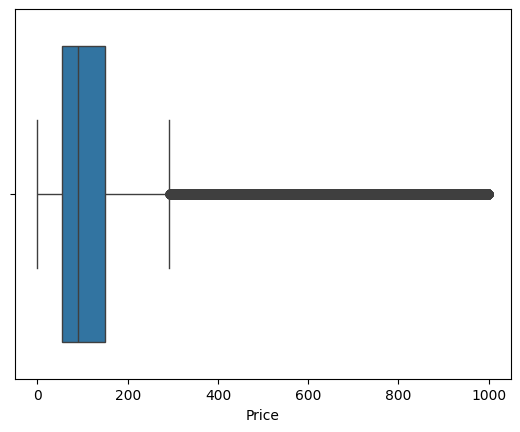

In [ ]:
#Visualization
sns.boxplot(x=df['Price'])
plt.show()

In [ ]:
#h) ⚖️ Data Skewness & Class Imbalance
#Skewness Check
df['Price'].skew()

np.float64(2.8839338502763123)

In [ ]:
#Log Transformation
df['log_price'] = np.log1p(df['Price'])

In [ ]:
#Class Imbalance (Room Type)
df['Room Type'].value_counts()

,count
Room Type,
Entire home/apt,313707
Private room,172306
Shared room,8939
9,1


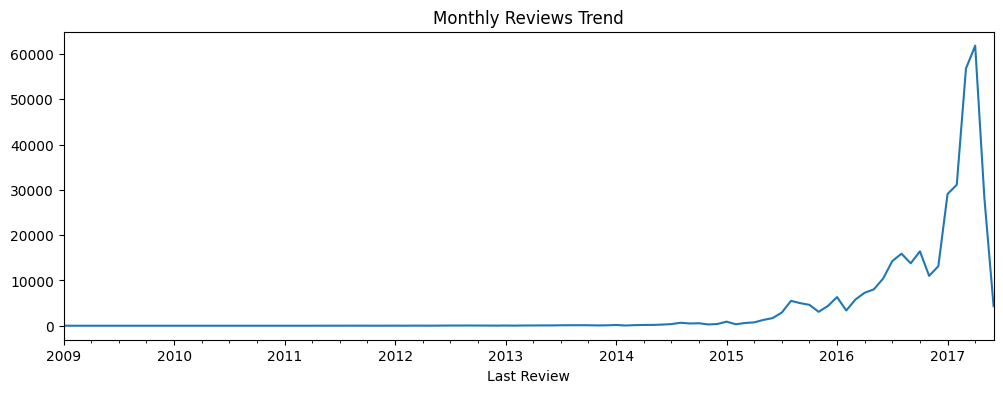

In [ ]:
#i)  Temporal & Trend Analysis
#Monthly Aggregation
monthly_reviews = df.groupby(df['Last Review'].dt.to_period('M')).size()

monthly_reviews.plot(figsize=(12,4))
plt.title("Monthly Reviews Trend")
plt.show()

In [ ]:
#j)Sampling & Approximate EDA
#Random Sampling
sample_df = df.sample(frac=0.1, random_state=42)

In [ ]:
#Compare Statistics
df['Price'].mean(), sample_df['Price'].mean()

(np.float64(138.0727028558756), np.float64(137.74445083853996))

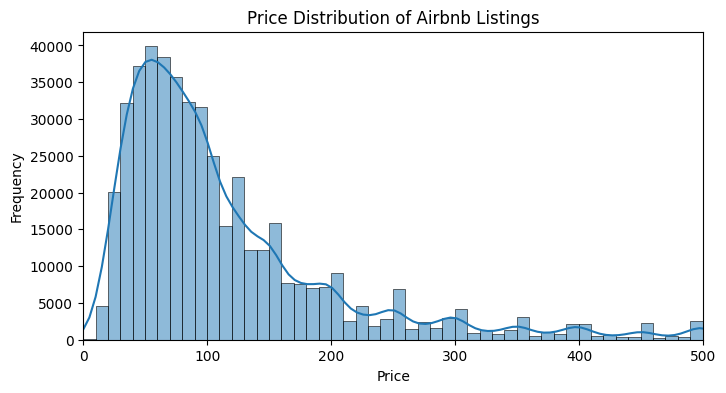

In [ ]:
#Price Distribution (Histogram + KDE)
#Understand pricing behavior and long-tail distribution.

plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=100, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.show()

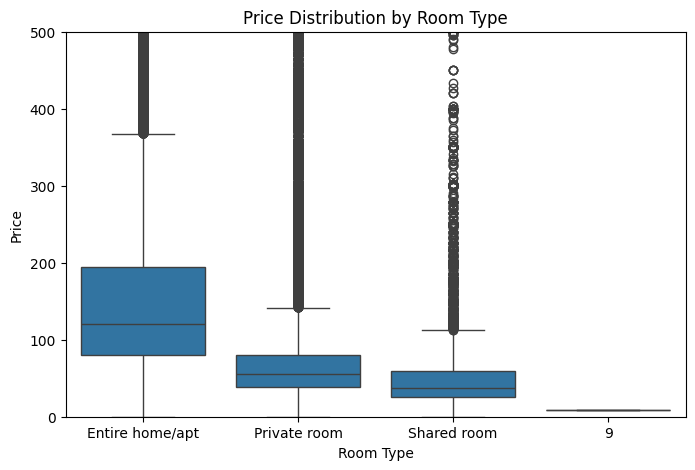

In [ ]:
#Room Type vs Price (Box Plot)
#Compare pricing behavior across room categories.

plt.figure(figsize=(8,5))
sns.boxplot(x='Room Type', y='Price', data=df)
plt.ylim(0, 500)
plt.title("Price Distribution by Room Type")
plt.show()

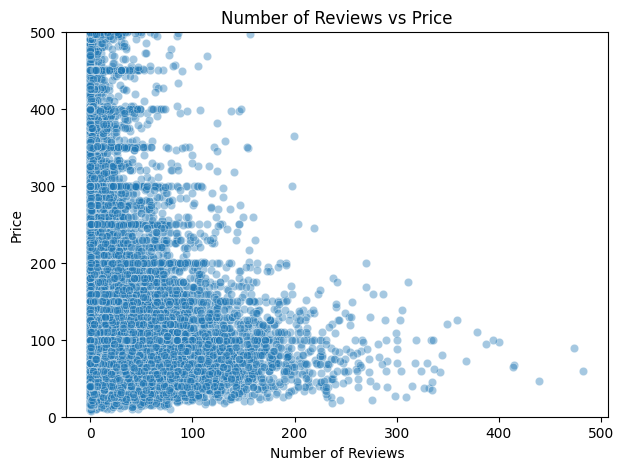

In [ ]:
#Number of Reviews vs Price
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Number of Reviews',
    y='Price',
    data=sample_df,
    alpha=0.4
)
plt.ylim(0, 500)
plt.title("Number of Reviews vs Price")
plt.show()